# Exploring eBay Car Sales Data


We'll use data from [eBay Kleinanzeigen](https://en.wikipedia.org/wiki/Classified_advertising), a classifieds section of the German eBay website. A few modifications have been made to the original dataset:

- 50,000 points have been sampled from the full dataset
- The dataset has been dirtied to test and improve data cleaning skills

The data dictionary is:
- ```dateCrawled``` - When this ad was first crawled. All field-values are taken from this date.
- ```name``` - Name of the car.
- ```seller``` - Whether the seller is private or a dealer.
- ```offerType``` - The type of listing
- ```price``` - The price on the ad to sell the car.
- ```abtest``` - Whether the listing is included in an A/B test.
- ```vehicleType``` - The vehicle Type.
- ```yearOfRegistration``` - The year in which the car was first registered.
- ```gearbox``` - The transmission type.
- ```powerPS``` - The power of the car in PS.
- ```model``` - The car model name.
- ```kilometer``` - How many kilometers the car has driven.
- ```monthOfRegistration``` - The month in which the car was first registered.
- ```fuelType``` - What type of fuel the car uses.
- ```brand``` - The brand of the car.
- ```notRepairedDamage``` - If the car has a damage which is not yet repaired.
- ```dateCreated``` - The date on which the eBay listing was created.
- ```nrOfPictures``` - The number of pictures in the ad.
- ```postalCode``` - The postal code for the location of the vehicle.
- ```lastSeenOnline``` - When the crawler saw this ad last online.


## Goal
Our goal is to create a clean data set and perform some basic analysis of the data.

### Import libraries and load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10)


%matplotlib inline

In [3]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The majority of columns are stored as strings. 

There are two columns that are stored as *objects* that we will want to convert to numerics: price and odometer. The price is an object because is begins with $. The odometer reading ends with km

There are five columns that have missing data. Sorted from least to most missing data: gearbox, model, fuelType, vehicleType, and notRepairedDamage

The dates are stored in YYYY-MM-DD format and the times are 24 hours. 

The column names are stored in camelcase.

### Cleaning Column Names

Let's change the column name case to snake case. This will make them easier to read

In [6]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
new_column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [8]:
autos.columns = new_column_names

In [9]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Identify cleaning tasks

In [10]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 19:48:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


seller and offer_type both are nearly uniform columns, with all values being the same with one exception. 

As mentioned previously, price and odometer columns will need to be cleaned and converted to numerical values. The price is an object because is begins with $. The odometer reading ends with km

In [11]:
autos['gearbox'].value_counts()

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

### Clean price and odometer columns

In [12]:
# remove initial $ and any , from price columns 
# and convert to a numeric dtype

autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['price'] = pd.to_numeric(autos['price'])
#autos['price'].dtype


In [13]:
# remove km from price columns 
# and convert to a numeric dtype
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')

autos['odometer'] = pd.to_numeric(autos['odometer'])
autos['odometer'].dtype

dtype('int64')

In [14]:
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)

### Explore odometer and price columns

In [15]:
# start with price

autos['price'].unique().shape

(2357,)

In [16]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [17]:
autos['price'].value_counts().sort_index(ascending=True).head(5)

0    1421
1     156
2       3
3       1
5       2
Name: price, dtype: int64

In [18]:
autos[(autos['price'] < 200) & (autos['price'] > 100)].count()

date_crawled          445
name                  445
seller                445
offer_type            445
price                 445
ab_test               445
vehicle_type          313
registration_year     445
gearbox               376
powerPS               445
model                 401
odometer_km           445
registration_month    445
fuel_type             337
brand                 445
unrepaired_damage     228
ad_created            445
nr_of_pictures        445
postal_code           445
last_seen             445
dtype: int64

The upper quartile is at $7200. We could consider values over 1,000,000 an extreme outlier. This is only 11 vehicles, so would not significantly change our dataset.

On the other end, we have 1421 cars listed at a price of $0 and 1762 at \< $100. These seem like very low prices for cars, so we'll (somewhat arbitrarily) use this as a cutoff to remove extreme price outliers. There are only 445 values between 100 and 200, so we see that this number drops relatively quickly. 

In [19]:
# drop these rows now

autos = autos[(autos['price'] > 100) & (autos['price'] < 1000000)]
autos.shape

(48093, 20)

In [20]:
# now look at odometer
autos['odometer_km'].unique().shape

(13,)

In [21]:
autos['odometer_km'].describe()

count     48093.000000
mean     125922.483522
std       39518.290347
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [22]:
autos['odometer_km'].value_counts()

150000    31119
125000     5027
100000     2097
90000      1731
80000      1410
70000      1212
60000      1151
50000      1009
40000       814
30000       776
20000       755
5000        747
10000       245
Name: odometer_km, dtype: int64

The odometer column does not seem to have any unusual outliers. All values are one of 13 unique values, between 5000 and 150000. This seems reasonable since we are dealing with used cars. Reported values must be rounded to the nearest 10- or 25-thousand miles. 

### Exploring the date columns

Let's explore the date columns to understand the date ranges this data covers. There are 5 columns related to dates. Three of those are currently stored as strings, so we need to convert into numerical representation so that we can analyze it. 

In [23]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


Let's create a distribution of dates by extracting them first.

In [24]:
autos['date_crawled'].str[:10].value_counts(normalize=True,dropna=False)

2016-04-03    0.038613
2016-03-20    0.037760
2016-03-21    0.037303
2016-03-12    0.036949
2016-03-14    0.036637
2016-04-04    0.036554
2016-03-07    0.035951
2016-04-02    0.035598
2016-03-28    0.034995
2016-03-19    0.034724
2016-03-15    0.034225
2016-03-29    0.034101
2016-03-30    0.033789
2016-04-01    0.033685
2016-03-08    0.033227
2016-03-09    0.032999
2016-03-22    0.032915
2016-03-11    0.032645
2016-03-10    0.032354
2016-03-23    0.032292
2016-03-26    0.032229
2016-03-31    0.031834
2016-03-17    0.031522
2016-03-25    0.031398
2016-03-27    0.031127
2016-03-16    0.029443
2016-03-24    0.029443
2016-03-05    0.025388
2016-03-13    0.015720
2016-03-06    0.014056
2016-04-05    0.013100
2016-03-18    0.012871
2016-04-06    0.003161
2016-04-07    0.001393
Name: date_crawled, dtype: float64

In [25]:
autos['ad_created'].str[:10].value_counts(normalize=True,dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038862
2016-04-04    0.036908
2016-04-05    0.011831
2016-04-06    0.003244
2016-04-07    0.001248
Name: ad_created, Length: 76, dtype: float64

In [26]:
autos['last_seen'].str[:10].value_counts(normalize=True,dropna=False)

2016-04-06    0.221966
2016-04-07    0.132223
2016-04-05    0.125153
2016-03-17    0.028071
2016-04-03    0.025139
2016-04-02    0.024848
2016-03-30    0.024640
2016-04-04    0.024515
2016-03-31    0.023850
2016-03-12    0.023829
2016-04-01    0.022872
2016-03-29    0.022332
2016-03-22    0.021375
2016-03-28    0.020814
2016-03-20    0.020668
2016-03-21    0.020564
2016-03-24    0.019712
2016-03-25    0.019109
2016-03-23    0.018589
2016-03-26    0.016697
2016-03-16    0.016427
2016-03-15    0.015824
2016-03-19    0.015761
2016-03-27    0.015512
2016-03-14    0.012621
2016-03-11    0.012413
2016-03-10    0.010646
2016-03-09    0.009565
2016-03-13    0.008879
2016-03-18    0.007319
2016-03-08    0.007298
2016-03-07    0.005385
2016-03-06    0.004304
2016-03-05    0.001081
Name: last_seen, dtype: float64

The majority of these dates come from 2016. The crawler was only run in March and April of 2016. Thus, the date_crawled and last_seen columns have similar ranges of dates. 

The ads were created between June of 2015 and April of 2016.

Now, let's take a look at the registration years of the cars.

In [27]:
autos['registration_year'].value_counts().sort_index().tail(15)
#describe()
#value_counts()

2015     380
2016    1196
2017    1382
2018     468
2019       1
2800       1
4100       1
4500       1
4800       1
5000       3
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, dtype: int64

The mean registration year is 2004, with a wider range of standard deviations of 88 years. This indicates that there are a decent number of older cars. However, we also see that the minimum year is 1000 and the max year is 9999. So there is some incorrect data for the registration years that we'll need to deal with. 

The first production of automobiles in Germany was late 1800s, so we can use 1900 as a cut-off. 

At the other end, the crawler was run in 2016, so we should not find cars with registration years later than that. There are about 2500 autos with 2017 and 2018 registrations listed, which could be typos. Values larger than that should definitely not be used for analysis. 

We will use 1900-2016 as the range of acceptable values. The number of autos we lose from 2017 and 2018 are relatively small.

In [28]:
autos = autos[(autos['registration_year'] > 1900) 
              & (autos['registration_year'] < 2017)]

In [29]:
autos['registration_year'].value_counts(normalize=True,ascending=True)

1952    0.000022
1943    0.000022
1953    0.000022
1939    0.000022
1938    0.000022
          ...   
2003    0.058261
2004    0.058391
1999    0.062134
2005    0.062934
2000    0.066612
Name: registration_year, Length: 78, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38fba6f190>]],
      dtype=object)

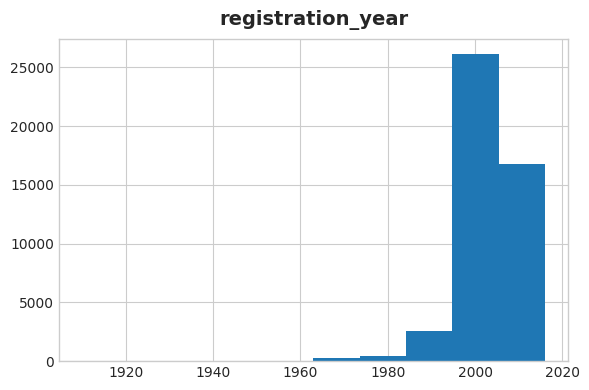

In [30]:
autos.hist(column='registration_year')

There are very few cars that were first registered before 1960.

### Exploring Price by Brand

Let's now explore price based on brand. We have quite a few different brands included in our data, so for simplicity we'll need to break this down. When we look at the normalized value counts by brand, we decide to focus on only those brands that account for at least 1% of the total values. 

In [31]:
autos['brand'].value_counts(normalize=True)

volkswagen        0.211410
bmw               0.110443
opel              0.107025
mercedes_benz     0.096900
audi              0.086926
ford              0.069576
renault           0.046946
peugeot           0.029855
fiat              0.025507
seat              0.018259
skoda             0.016442
nissan            0.015339
mazda             0.015187
smart             0.014235
citroen           0.014041
toyota            0.012829
hyundai           0.010038
sonstige_autos    0.009519
volvo             0.009130
mini              0.008805
mitsubishi        0.008156
honda             0.007853
kia               0.007096
alfa_romeo        0.006685
porsche           0.006036
suzuki            0.005885
chevrolet         0.005668
chrysler          0.003526
dacia             0.002661
daihatsu          0.002488
jeep              0.002293
subaru            0.002120
land_rover        0.002120
saab              0.001666
jaguar            0.001536
daewoo            0.001471
trabant           0.001363
r

In [32]:
autos['brand'].value_counts().index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini',
       'mitsubishi', 'honda', 'kia', 'alfa_romeo', 'porsche', 'suzuki',
       'chevrolet', 'chrysler', 'dacia', 'daihatsu', 'jeep', 'subaru',
       'land_rover', 'saab', 'jaguar', 'daewoo', 'trabant', 'rover', 'lancia',
       'lada'],
      dtype='object')

In [33]:
brand_list = ['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai']

brand_dict = {}

for x in brand_list:
    short_auto = autos[autos['brand'] == x]
    mean_price = short_auto['price'].mean()
    brand_dict[x] = mean_price
    
print(brand_dict)

{'volkswagen': 5656.340871878838, 'bmw': 8384.921841332027, 'opel': 3019.591873862947, 'mercedes_benz': 8674.568207189104, 'audi': 9389.95769039323, 'ford': 4114.208022388059, 'renault': 2509.320737327189, 'peugeot': 3122.5963768115944, 'fiat': 2855.4444444444443, 'seat': 4443.688388625593, 'skoda': 6417.9118421052635, 'nissan': 4769.795486600846, 'mazda': 4152.736467236467, 'smart': 3596.40273556231, 'citroen': 3807.653312788906, 'toyota': 5167.091062394604, 'hyundai': 5411.075431034483}


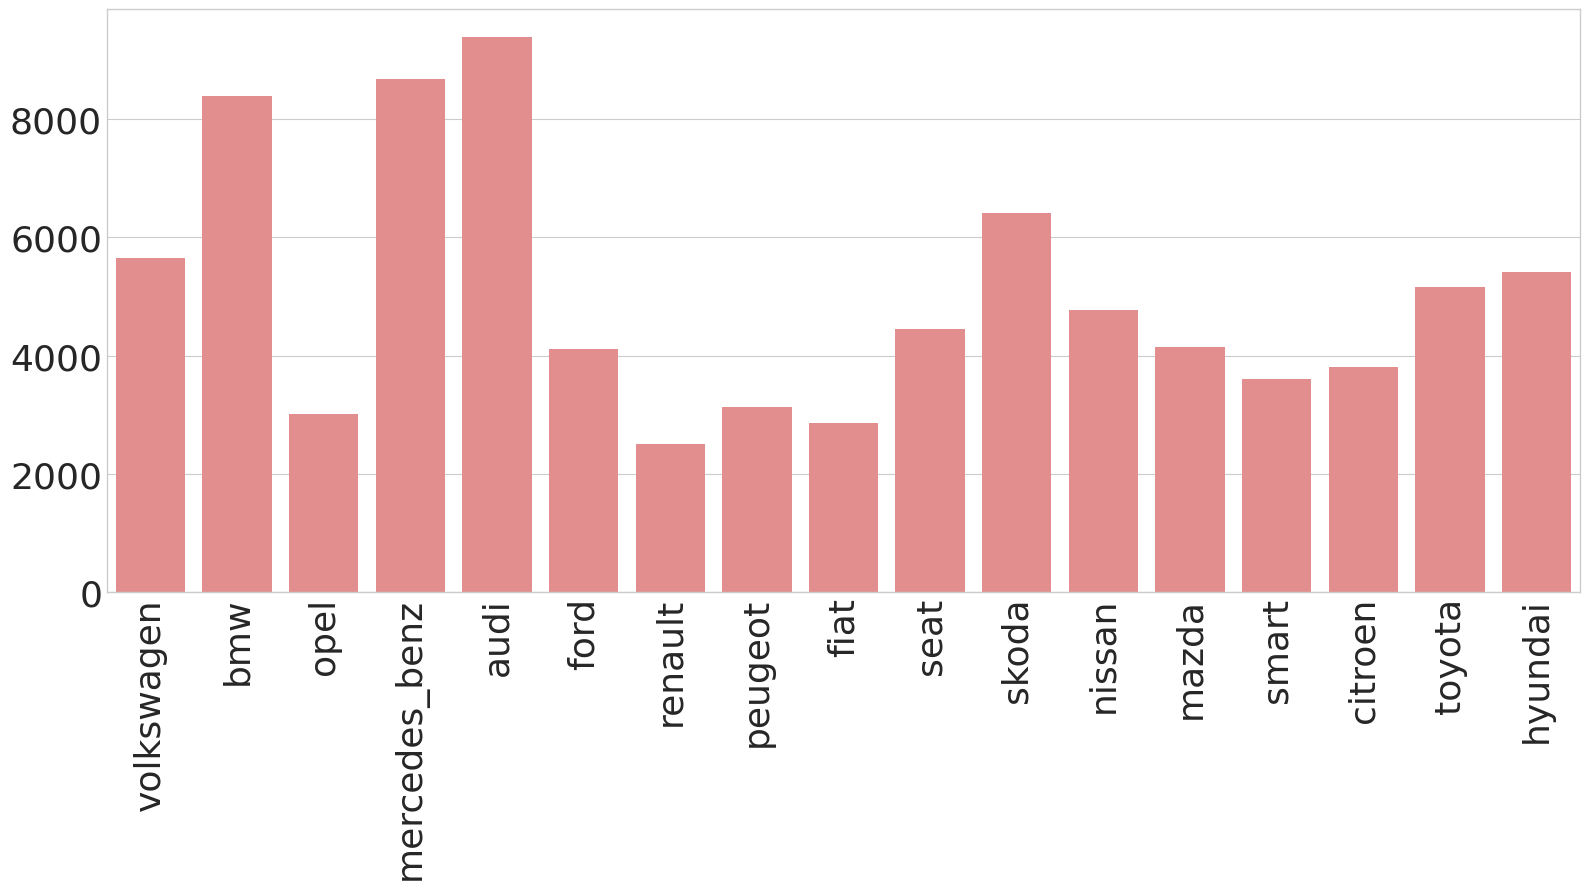

In [39]:
# plot averages price by brand

keys = list(brand_dict.keys())
vals = list(brand_dict.values())

plt.figure(figsize=(16,9))
sns.barplot(x = keys, y = vals, color = 'lightcoral')
plt.xticks(rotation=90,fontsize=26)
plt.yticks(fontsize=26)
plt.show()

We see that BMW, Mercedes Benz, and Audi have the highest mean price by quite a lot. 

Now, let's look at only the top 6 brands: Audi, BMW, Mercedes Benz, Ford, Opel, and Volkswagen. Let's use aggregation to understand the average mileage for those cars and see if there's any link with mean price. 

In [35]:
#shorten our above dictionary to only the six brands we care about
short_brand_list = ['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford']

short_brand_dict = {}

for x in short_brand_list:
    short_auto = autos[autos['brand'] == x]
    mean_price = short_auto['price'].mean()
    short_brand_dict[x] = mean_price

In [36]:
# calculate the mean mileage per vehicle

short_mpv = {}

for x in short_brand_list:
    short_auto = autos[autos['brand'] == x]
    mean_km = short_auto['odometer_km'].mean()
    short_mpv[x] = mean_km

In [37]:
price_series = pd.Series(short_brand_dict)
mileage_series = pd.Series(short_mpv)

df = pd.DataFrame(price_series, columns=['mean_price'])
df['mean_mileage'] = mileage_series

In [38]:
df

,mean_price,mean_mileage
volkswagen,5656.340872,128787.863283
bmw,8384.921841,132716.944172
opel,3019.591874,129379.421872
mercedes_benz,8674.568207,131053.806653
audi,9389.957690,129260.826282
ford,4114.208022,124249.067164


The mean mileage is pretty similar to each other for these top six brands. This indicates that the difference in price is likely caused by inherent differences in the starting price point. 